In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle("saved_df.pkl") 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


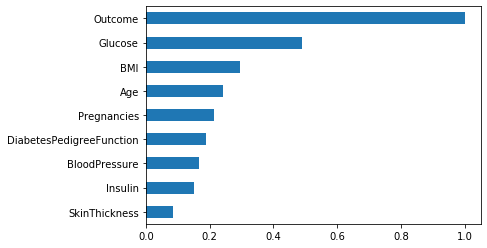

In [4]:
df.corr()['Outcome'].sort_values().plot.barh()

In [5]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[122,  24],
       [ 31,  36]], dtype=int64)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [9]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
74,1,79,75,30,0,32.0,0.396,22
13,1,189,60,23,846,30.1,0.398,59
401,6,137,61,0,0,24.2,0.151,55
634,10,92,62,0,0,25.9,0.167,31
197,3,107,62,13,48,22.9,0.678,23


In [10]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.696356,121.362348,72.536437,21.216599,83.748988,32.447571,0.474142,33.172065
std,3.087124,29.868887,11.833432,15.186990,116.644576,6.743599,0.339204,11.731303
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.800000,0.240250,24.000000
50%,3.000000,116.000000,72.000000,24.000000,46.500000,32.150000,0.372500,29.000000
75%,6.000000,140.000000,80.000000,33.000000,130.000000,36.750000,0.635500,41.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,67.000000


In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
a = pd.DataFrame(X_train, columns=X.columns)

In [13]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.874306,-1.419714,0.208398,0.578937,-0.718712,-0.066437,-0.230602,-0.953295
1,-0.874306,2.266781,-1.060482,0.117549,6.541442,-0.348471,-0.224700,2.203857
2,0.746967,0.524074,-0.975890,-1.398441,-0.718712,-1.224262,-0.953614,1.862543
3,2.043985,-0.984038,-0.891298,-1.398441,-0.718712,-0.971915,-0.906397,-0.185339
4,-0.225797,-0.481334,-0.891298,-0.541577,-0.306789,-1.417233,0.601600,-0.867966


In [14]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [15]:
y_pred=knn_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[122,  24],
       [ 31,  36]], dtype=int64)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



## Model Tuning ##

In [17]:
knn = KNeighborsClassifier()

In [18]:
np.arange(0,50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [19]:
knn_params = {'n_neighbors': np.arange(1,50)}

In [20]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [21]:
knn_cv_model.best_params_

{'n_neighbors': 13}

In [22]:
knn_tuned = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train) # best_param ne çıktı ise n_neighbors değeri olarak onu giriyoruz

In [23]:
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.65      0.48      0.55        67

    accuracy                           0.76       213
   macro avg       0.72      0.68      0.69       213
weighted avg       0.74      0.76      0.74       213



In [24]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring="recall", cv=10).fit(X_train,y_train)

In [25]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [26]:
knn_tuned_2 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred = knn_tuned_2.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       146
           1       0.56      0.57      0.56        67

    accuracy                           0.72       213
   macro avg       0.68      0.68      0.68       213
weighted avg       0.72      0.72      0.72       213



In [27]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [28]:
import pickle
pickle.dump(log_model, open("my_model", 'wb'))

In [29]:
import pickle
pickle.dump(log_model, open('my_model', 'wb')) # Saving the model

In [30]:
model = pickle.load(open('my_model', 'rb'))

In [31]:
prediction = model.predict(X)

In [32]:
prediction[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [33]:
df['Pred'] = prediction

In [34]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
220,0,177,60,29,478,34.6,1.072,21,1,1
476,2,105,80,45,191,33.7,0.711,29,1,0
345,8,126,88,36,108,38.5,0.349,49,0,0
410,6,102,90,39,0,35.7,0.674,28,0,0
677,0,93,60,0,0,35.3,0.263,25,0,0
746,1,147,94,41,0,49.3,0.358,27,1,0
474,4,114,64,0,0,28.9,0.126,24,0,0
427,1,181,64,30,180,34.1,0.328,38,1,0
358,12,88,74,40,54,35.3,0.378,48,0,0
661,1,199,76,43,0,42.9,1.394,22,1,1


In [35]:
pred_prob = model.predict_proba(X) # model tahmin olasılıklarını (probability) yazdırır. 0.5 den büyükse 1 küçükse 0 yazdırır (edited) 

In [36]:
df['Prob'] = pred_prob[:,1] # veride prediction değerleri ile probabilty değerlerini karşılaştırmak için probabilty değerleri verisetine eklendi.

In [37]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
277,0,104,64,23,116,27.8,0.454,23,0,0,0.134273
226,0,101,76,0,0,35.7,0.198,26,0,0,0.096327
310,6,80,66,30,0,26.2,0.313,41,0,0,0.137303
400,4,95,64,0,0,32.0,0.161,31,1,0,0.166751
686,3,130,64,0,0,23.1,0.314,22,0,0,0.264171
153,1,153,82,42,485,40.6,0.687,23,0,0,0.444005
665,1,112,80,45,132,34.8,0.217,24,0,0,0.091190
120,0,162,76,56,100,53.2,0.759,25,1,1,0.780716
651,1,117,60,23,106,33.8,0.466,27,0,0,0.293990
158,2,88,74,19,53,29.0,0.229,22,0,0,0.071785
